# 一起来打怪之 Credit Scoring 练习

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /home
!pwd

/home
/home


-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [5]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [6]:
# 检查数据维度
data.shape

(112915, 11)

In [7]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [8]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

<ipython-input-8-beec89bb13a8>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [9]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [10]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.shape, X_test.shape

((76053, 10), (32595, 10))

0    101322
1      7326
Name: SeriousDlqin2yrs, dtype: int64


<Axes: >

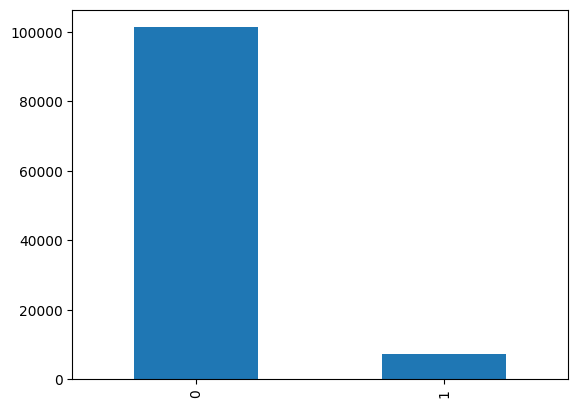

In [11]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
print(y.value_counts())

# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
y.value_counts().plot(kind='bar')


#### 2.数据预处理之离散化

In [12]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
# 确定age的最小值和最大值
age_min = int(X_train['age'].min())
age_max = int(X_train['age'].max())

# 创建区间边界
bins = list(range(age_min, age_max + 3, 3))

# 使用cut函数进行离散化
X_train['age_class'] = pd.cut(X_train.age, bins=bins, include_lowest=True)
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_class
87116,0.408449,54.0,0.0,0.206660,6696.0,20.0,0.0,0.0,0.0,2.0,"(51.0, 54.0]"
60949,0.236068,72.0,0.0,0.383361,13365.0,10.0,0.0,3.0,0.0,0.0,"(69.0, 72.0]"
81875,0.029731,65.0,1.0,0.260219,7950.0,8.0,0.0,2.0,0.0,2.0,"(63.0, 66.0]"
48666,0.021520,49.0,0.0,0.548327,7500.0,12.0,0.0,2.0,0.0,0.0,"(48.0, 51.0]"
56435,0.450862,24.0,0.0,0.941176,900.0,3.0,0.0,0.0,0.0,0.0,"(21.0, 24.0]"
...,...,...,...,...,...,...,...,...,...,...,...
52062,0.015245,57.0,0.0,0.101078,6400.0,9.0,0.0,0.0,0.0,1.0,"(54.0, 57.0]"
101903,0.026483,42.0,0.0,0.336710,6711.0,20.0,0.0,2.0,0.0,2.0,"(39.0, 42.0]"
5396,0.094593,49.0,0.0,0.098861,5269.0,8.0,0.0,0.0,0.0,0.0,"(48.0, 51.0]"
80798,0.133383,55.0,0.0,0.477288,10500.0,19.0,0.0,3.0,0.0,0.0,"(54.0, 57.0]"


In [13]:

X_test['age_class'] = pd.cut(X_test.age, bins=bins, include_lowest=True)
X_test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_class
94876,0.110716,71.0,0.0,0.379946,7100.0,19.0,0.0,1.0,0.0,0.0,"(69.0, 72.0]"
74492,0.022211,58.0,0.0,0.266376,11250.0,10.0,0.0,1.0,0.0,2.0,"(57.0, 60.0]"
48991,0.995334,54.0,0.0,0.229102,2583.0,3.0,0.0,1.0,0.0,3.0,"(51.0, 54.0]"
109765,0.012314,80.0,0.0,0.002997,1000.0,2.0,0.0,0.0,0.0,1.0,"(78.0, 81.0]"
16286,0.671940,50.0,0.0,0.316112,15000.0,15.0,0.0,1.0,0.0,2.0,"(48.0, 51.0]"
...,...,...,...,...,...,...,...,...,...,...,...
105990,0.432024,74.0,0.0,0.732508,2100.0,10.0,0.0,2.0,0.0,0.0,"(72.0, 75.0]"
31564,1.000000,51.0,0.0,0.293369,4086.0,7.0,2.0,0.0,0.0,0.0,"(48.0, 51.0]"
47890,0.728543,60.0,1.0,0.305331,3094.0,5.0,0.0,1.0,0.0,0.0,"(57.0, 60.0]"
102980,0.056936,62.0,0.0,0.173340,22700.0,7.0,0.0,2.0,0.0,2.0,"(60.0, 63.0]"


#### 3.数据预处理之独热向量编码

In [14]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
X_train = pd.get_dummies(X_train, dtype='float')
X_train = X_train.drop('age', axis=1)
X_train

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_class_(-0.001, 3.0]","age_class_(3.0, 6.0]","age_class_(6.0, 9.0]","age_class_(9.0, 12.0]","age_class_(12.0, 15.0]","age_class_(15.0, 18.0]","age_class_(18.0, 21.0]","age_class_(21.0, 24.0]","age_class_(24.0, 27.0]","age_class_(27.0, 30.0]","age_class_(30.0, 33.0]","age_class_(33.0, 36.0]","age_class_(36.0, 39.0]","age_class_(39.0, 42.0]","age_class_(42.0, 45.0]","age_class_(45.0, 48.0]","age_class_(48.0, 51.0]","age_class_(51.0, 54.0]","age_class_(54.0, 57.0]","age_class_(57.0, 60.0]","age_class_(60.0, 63.0]","age_class_(63.0, 66.0]","age_class_(66.0, 69.0]","age_class_(69.0, 72.0]","age_class_(72.0, 75.0]","age_class_(75.0, 78.0]","age_class_(78.0, 81.0]","age_class_(81.0, 84.0]","age_class_(84.0, 87.0]","age_class_(87.0, 90.0]","age_class_(90.0, 93.0]","age_class_(93.0, 96.0]","age_class_(96.0, 99.0]","age_class_(99.0, 102.0]"
87116,0.408449,0.0,0.206660,6696.0,20.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60949,0.236068,0.0,0.383361,13365.0,10.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81875,0.029731,1.0,0.260219,7950.0,8.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48666,0.021520,0.0,0.548327,7500.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56435,0.450862,0.0,0.941176,900.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52062,0.015245,0.0,0.101078,6400.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101903,0.026483,0.0,0.336710,6711.0,20.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5396,0.094593,0.0,0.098861,5269.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80798,0.133383,0.0,0.477288,10500.0,19.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X_test = pd.get_dummies(X_test, dtype='float')
X_test = X_test.drop('age', axis=1)
X_test

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_class_(-0.001, 3.0]","age_class_(3.0, 6.0]","age_class_(6.0, 9.0]","age_class_(9.0, 12.0]","age_class_(12.0, 15.0]","age_class_(15.0, 18.0]","age_class_(18.0, 21.0]","age_class_(21.0, 24.0]","age_class_(24.0, 27.0]","age_class_(27.0, 30.0]","age_class_(30.0, 33.0]","age_class_(33.0, 36.0]","age_class_(36.0, 39.0]","age_class_(39.0, 42.0]","age_class_(42.0, 45.0]","age_class_(45.0, 48.0]","age_class_(48.0, 51.0]","age_class_(51.0, 54.0]","age_class_(54.0, 57.0]","age_class_(57.0, 60.0]","age_class_(60.0, 63.0]","age_class_(63.0, 66.0]","age_class_(66.0, 69.0]","age_class_(69.0, 72.0]","age_class_(72.0, 75.0]","age_class_(75.0, 78.0]","age_class_(78.0, 81.0]","age_class_(81.0, 84.0]","age_class_(84.0, 87.0]","age_class_(87.0, 90.0]","age_class_(90.0, 93.0]","age_class_(93.0, 96.0]","age_class_(96.0, 99.0]","age_class_(99.0, 102.0]"
94876,0.110716,0.0,0.379946,7100.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74492,0.022211,0.0,0.266376,11250.0,10.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48991,0.995334,0.0,0.229102,2583.0,3.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109765,0.012314,0.0,0.002997,1000.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16286,0.671940,0.0,0.316112,15000.0,15.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105990,0.432024,0.0,0.732508,2100.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31564,1.000000,0.0,0.293369,4086.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47890,0.728543,1.0,0.305331,3094.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102980,0.056936,0.0,0.173340,22700.0,7.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 4.数据预处理之幅度缩放

In [16]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std

array([[-0.02280078, -0.10952419, -0.44571797, ..., -0.0183736 ,
        -0.01356876, -0.005539  ],
       [-0.02352386, -0.10952419,  0.34755716, ..., -0.0183736 ,
        -0.01356876, -0.005539  ],
       [-0.02438938,  0.18379115, -0.20527158, ..., -0.0183736 ,
        -0.01356876, -0.005539  ],
       ...,
       [-0.02411731, -0.10952419, -0.92966324, ..., -0.0183736 ,
        -0.01356876, -0.005539  ],
       [-0.0239546 , -0.10952419,  0.76923   , ..., -0.0183736 ,
        -0.01356876, -0.005539  ],
       [-0.02249839, -0.10952419,  1.48235852, ..., -0.0183736 ,
        -0.01356876, -0.005539  ]])

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [17]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_std, y_train)
coefficients = lr.coef_
print("Coefficients:", coefficients)

Coefficients: [[-2.81589427e-02  1.63969606e+00  2.96352536e-01 -1.28711091e-01
  -1.17800741e-01  1.44089745e+00 -1.53793032e-01 -2.91889200e+00
   8.30549763e-02 -2.69194891e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.23147494e-02
   6.22851242e-02  1.05842914e-01  1.23723820e-01  1.00275470e-01
   8.62764684e-02  6.00809812e-02  6.98201692e-02  4.27174214e-02
   6.21330528e-02  4.78632927e-02  4.40763401e-02 -1.73953563e-02
  -3.55745157e-02 -5.91254236e-02 -1.22688949e-01 -1.37964712e-01
  -1.05043205e-01 -9.35789660e-02 -1.15241058e-01 -1.44065903e-01
  -7.62206144e-02 -5.44624724e-02 -1.12937889e-02 -2.40835057e-02
  -2.02254765e-01  1.45156952e-02 -5.22338763e-02]]


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [18]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参

from sklearn.model_selection import GridSearchCV


logreg = LogisticRegression(solver='liblinear')

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100, 500]
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_std, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [20]:
# 输出最好的超参数
# 输出最好的模型

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


best_model = grid_search.best_estimator_


Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.93


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [21]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score


y_pred = best_model.predict(X_test_std)

# 精确度
precision = precision_score(y_test, y_pred)

# 召回率
recall = recall_score(y_test, y_pred)

# AUC
y_pred_prob = best_model.predict_proba(X_test_std)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)

# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# F1 值
f1 = f1_score(y_test, y_pred)


print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("Confusion Matrix:\n", conf_matrix)
print("F1 Score:", f1)


Precision: 0.5808823529411765
Recall: 0.03552158273381295
AUC: 0.7077820547881606
Confusion Matrix:
 [[30314    57]
 [ 2145    79]]
F1 Score: 0.06694915254237287


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [22]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


y_pred_probs = best_model.predict_proba(X_test_std)[:, 1]

for threshold in thresholds:

    y_pred = (y_pred_probs >= threshold).astype(int)

  
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

  
    print(f"Threshold: {threshold}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")


Threshold: 0.1
Precision: 0.20557645496791324
Recall: 0.4177158273381295
F1 Score: 0.2755450096396263
Confusion Matrix:
[[26781  3590]
 [ 1295   929]]

Threshold: 0.2
Precision: 0.4172972972972973
Recall: 0.1735611510791367
F1 Score: 0.24515719275960624
Confusion Matrix:
[[29832   539]
 [ 1838   386]]

Threshold: 0.3
Precision: 0.5319693094629157
Recall: 0.09352517985611511
F1 Score: 0.15908221797323135
Confusion Matrix:
[[30188   183]
 [ 2016   208]]

Threshold: 0.4
Precision: 0.5739910313901345
Recall: 0.05755395683453238
F1 Score: 0.10461789946873724
Confusion Matrix:
[[30276    95]
 [ 2096   128]]

Threshold: 0.5
Precision: 0.5808823529411765
Recall: 0.03552158273381295
F1 Score: 0.06694915254237287
Confusion Matrix:
[[30314    57]
 [ 2145    79]]

Threshold: 0.6
Precision: 0.5957446808510638
Recall: 0.025179856115107913
F1 Score: 0.04831751509922347
Confusion Matrix:
[[30333    38]
 [ 2168    56]]

Threshold: 0.7
Precision: 0.5172413793103449
Recall: 0.013489208633093525
F1 Score:

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [34]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

import numpy as np


feature_names = X_train.columns
coefficients = best_model.coef_[0]
features_importance = zip(feature_names, np.abs(coefficients))


sorted_features = sorted(features_importance, key=lambda x: x[1], reverse=True)
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

top_features = [feature for feature, importance in sorted_features]  
feature_names_list = feature_names.tolist()

top_features_indices = [feature_names_list.index(feature) for feature in top_features]


X_train_selected = X_train_std[:, top_features_indices]
X_test_selected = X_test_std[:, top_features_indices]

def new_model_func(model):

  model.fit(X_train_selected, y_train)

  y_pred = model.predict(X_test_selected)
  print("Precision:", precision_score(y_test, y_pred))
  print("Recall:", recall_score(y_test, y_pred))
  print("F1 Score:", f1_score(y_test, y_pred))
new_model = LogisticRegression()
new_model_func(new_model)

Feature: NumberOfTime60-89DaysPastDueNotWorse, Importance: 2.9174653938974706
Feature: NumberOfTime30-59DaysPastDueNotWorse, Importance: 1.6388460770487727
Feature: NumberOfTimes90DaysLate, Importance: 1.4403444959388176
Feature: DebtRatio, Importance: 0.2963457929465204
Feature: NumberRealEstateLoansOrLines, Importance: 0.15390142709018867
Feature: age_class_(27.0, 30.0], Importance: 0.1381495247113989
Feature: age_class_(78.0, 81.0], Importance: 0.1340374302506106
Feature: MonthlyIncome, Importance: 0.12802437048535784
Feature: age_class_(66.0, 69.0], Importance: 0.1228107647427749
Feature: NumberOfOpenCreditLinesAndLoans, Importance: 0.11780801501606504
Feature: age_class_(24.0, 27.0], Importance: 0.11737185444635168
Feature: age_class_(30.0, 33.0], Importance: 0.11627012277656434
Feature: age_class_(63.0, 66.0], Importance: 0.10610256001455878
Feature: age_class_(93.0, 96.0], Importance: 0.10529771171509311
Feature: age_class_(75.0, 78.0], Importance: 0.10472219206856115
Feature: a

#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [36]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
print("随机森林")
new_model = RandomForestClassifier()
new_model_func(new_model)
# 支持向量机
from sklearn.svm import SVC
print("支持向量机")
new_model = SVC()
new_model_func(new_model)
# K最近邻
from sklearn.neighbors import KNeighborsClassifier
print("K最近邻")
new_model = KNeighborsClassifier()
new_model_func(new_model)



随机森林
Precision: 0.5507745266781411
Recall: 0.14388489208633093
F1 Score: 0.22816399286987524
支持向量机
Precision: 0.6
Recall: 0.009442446043165468
F1 Score: 0.01859229747675963
K最近邻
Precision: 0.46301369863013697
Recall: 0.07598920863309352
F1 Score: 0.13055233680957898
